<a href="https://colab.research.google.com/github/AishaKanwal/TSFGRIP-DataScienceAndBuisnessAnalyticsInternship/blob/main/Task6_IrisPrediction_DecisionTreeAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intern: Aisha Kanwal
> **Level: Intermediate**

>**Task 6: Iris Prediction using Decision Tree Algorithm**

> **Assigned Task: Predict the right class for the new data when added**

> **TSF | GRIP | Data Science and Business Analytics | May Batch 2023**

## Import Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dataset from google drive

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
iris = '/content/drive/MyDrive/ColabNotebooks/Iris.csv'
df = pd.read_csv(iris)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [41]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

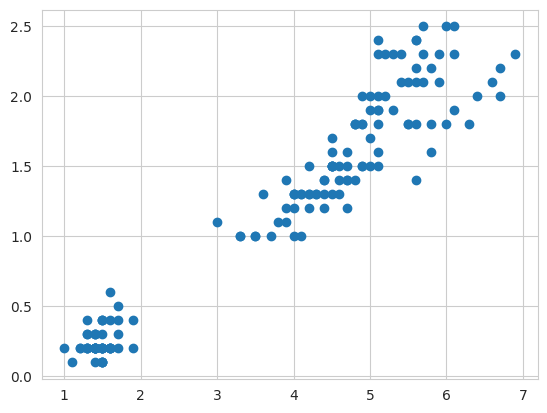

In [42]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.show()

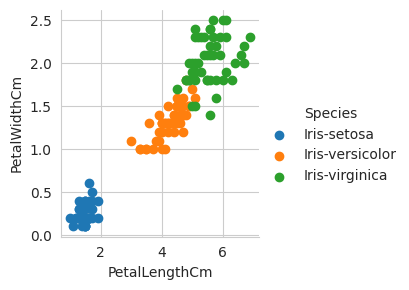

In [43]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Species') \
.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm') \
.add_legend()
plt.show()

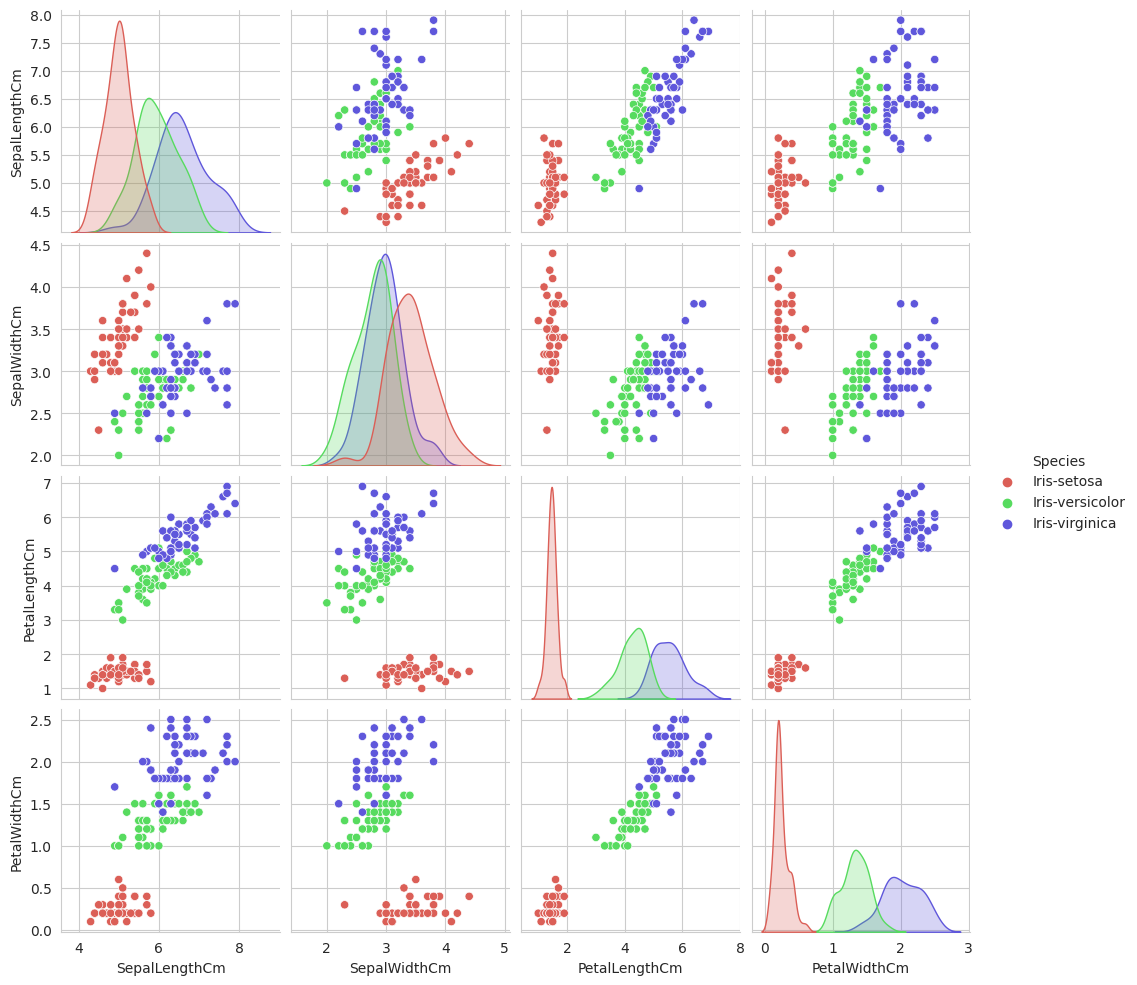

In [44]:
sns.pairplot(df.drop(['Id'], axis=1), hue='Species', palette="hls")
plt.show()

# Generating a Classfication Model for Iris Dataset

### Iimporting libraries

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


### Spliting dataset into train and test datasets

In [46]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target (y)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Decision Tree Model

In [47]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Make prediction on test data

In [48]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Generate Decision Tree Chart

In [49]:
# !pip install graphviz --upgrade

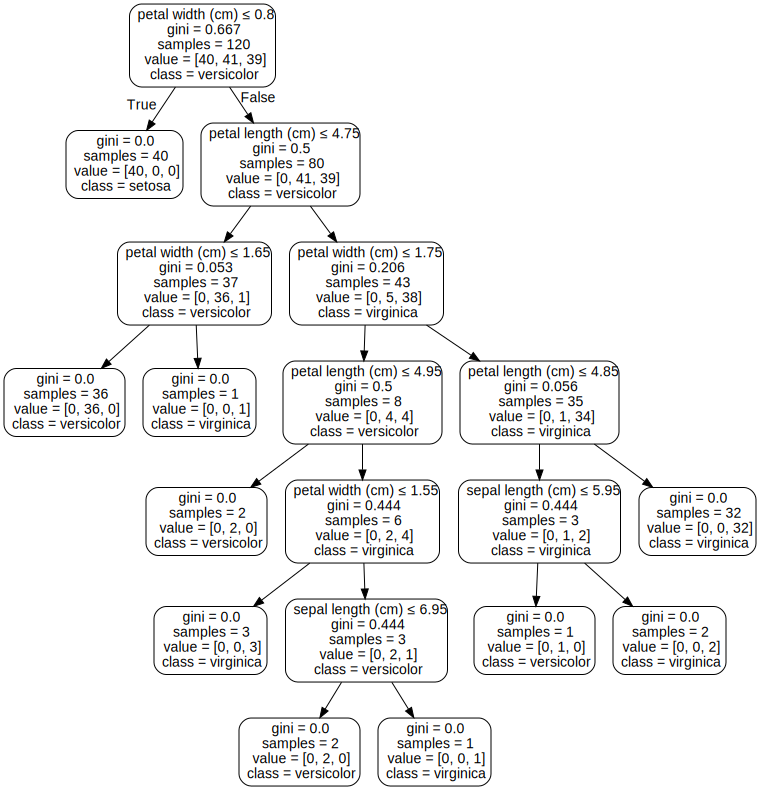

In [51]:
dot_data = export_graphviz(model, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")
graph

Enter the sepal length: 5.8
Enter the sepal width: 4.6
Enter the petal length: 1.8
Enter the petal width: 2.8


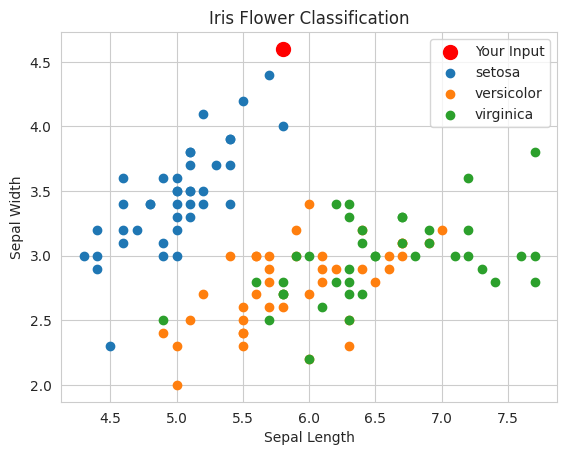

Predicted class: ['virginica']
Accuracy on your input data: 1.0


In [52]:
# Function to predict the class of new data and show it visually
def predict_and_visualize(new_data):
    # Predict the class of the new data
    predicted_class = model.predict([new_data])

    # Get the class label
    predicted_label = iris.target_names[predicted_class]

    # Plot the new data point
    plt.scatter(new_data[0], new_data[1], s=100, c='r', marker='o', label='Your Input')

    # Plot the existing data points
    for i in range(3):
        plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=iris.target_names[i])

    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Iris Flower Classification')
    plt.legend()
    plt.show()

    # Print the predicted class label
    print('Predicted class:', predicted_label)

# Get input from the user
sepal_length = float(input("Enter the sepal length: "))
sepal_width = float(input("Enter the sepal width: "))
petal_length = float(input("Enter the petal length: "))
petal_width = float(input("Enter the petal width: "))

new_data = [sepal_length, sepal_width, petal_length, petal_width]
predict_and_visualize(new_data)

# Calculate accuracy on the testing set
accuracy = model.score(X_test, y_test)
print('Accuracy on your input data:', accuracy)

# Task 6 - Iris Prediction using Decision Tree Algorithm
**Done by Aisha Kanwal**